In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import seaborn as sns 
plt.rcParams['figure.figsize'] = [16, 12]


In [13]:
image = cv2.imread("./1.jpg")

def mouse_callback(event, x, y, flags, param):
    global positions
    global image 
    
    if event == cv2.EVENT_LBUTTONDOWN:
        positions.append((x, y))
        cv2.circle(image, positions[-1], 5, (91, 80, 242), -1)

cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)
positions = []

while True:
    # Display the image
    cv2.imshow("Image", image)
    # Check for key press
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyWindow("Image")
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break

# Close all windows
cv2.destroyAllWindows()

position = np.reshape(positions,(-1,2))

[[290 416]
 [562 170]
 [233 366]
 [543 110]
 [483 239]
 [129  10]
 [441 277]
 [ 84  31]]


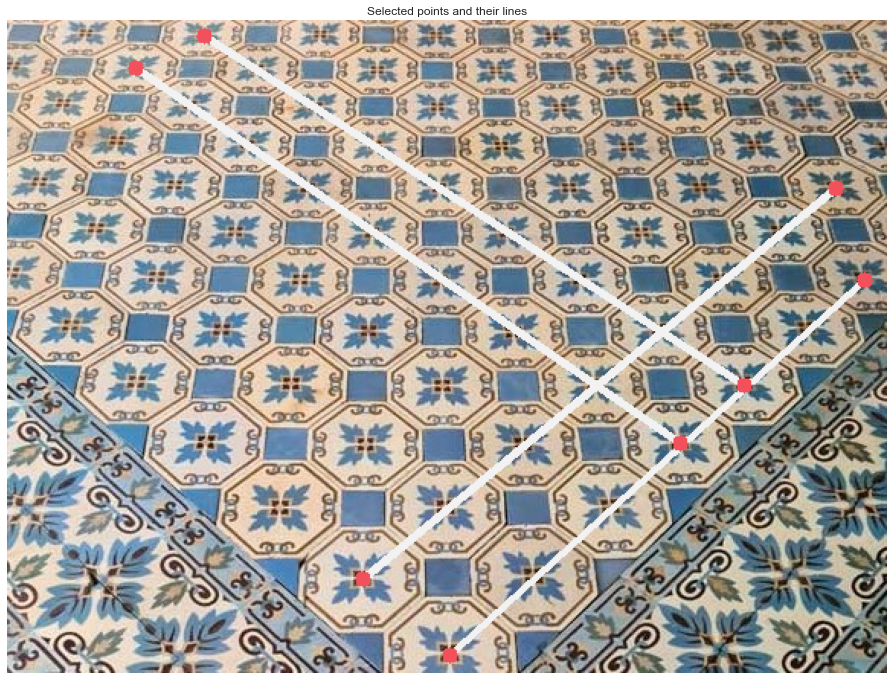

In [20]:
image = cv2.imread("./1.jpg")
position = np.array([[290, 416],
 [562, 170],
 [233, 366],
 [543, 110],
 [483, 239],
 [129,  10],
 [441, 277],
 [ 84,  31]])

print(position)    
for i in range(1,len(positions),2):
    cv2.line(image,pt1=positions[i-1],pt2=positions[i],color=(242,242,242),thickness=4)

for pos in positions:
    cv2.circle(image, pos, 5, (91, 80, 242), -1) 
    
plt.imshow(image[:,:,::-1])
plt.axis("off")
plt.title("Selected points and their lines")
plt.show()


Equation: y =0.033x -751.1631


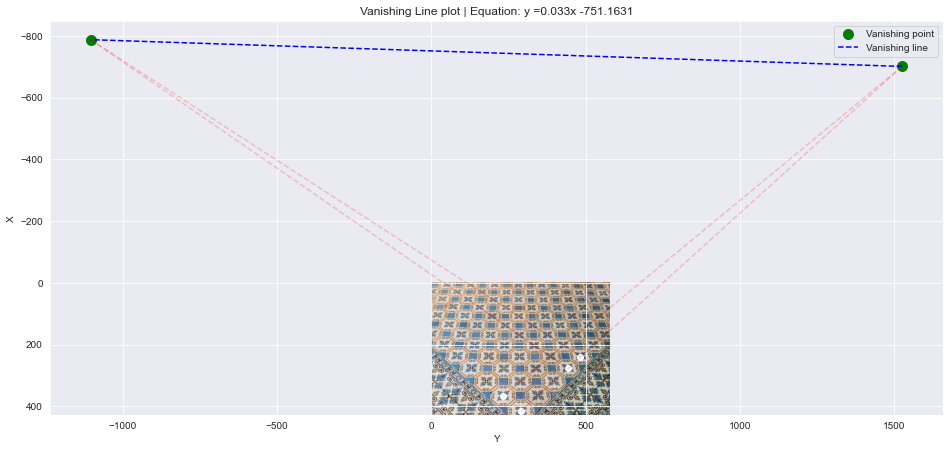

In [54]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

sns.set_style("darkgrid")
A = np.array(line_intersection(position[0:2],position[2:4]))
B = np.array(line_intersection(position[4:6],position[6:8]))

image = cv2.imread("./1.jpg")

X_range = [A[0],position[0][0]]
Y_range = [A[1],position[0][1]]
plt.scatter(X_range,Y_range,color="white")
plt.plot(X_range,Y_range,"--",color="red",alpha=.2)

X_range = [A[0],position[2][0]]
Y_range = [A[1],position[2][1]]
plt.scatter(X_range,Y_range,color="white")
plt.plot(X_range,Y_range,"--",color="red",alpha=.2)


X_range = [B[0],position[4][0]]
Y_range = [B[1],position[4][1]]
plt.scatter(X_range,Y_range,color="white")
plt.plot(X_range,Y_range,"--",color="red",alpha=.2)

X_range = [B[0],position[6][0]]
Y_range = [B[1],position[6][1]]
plt.scatter(X_range,Y_range,color="white")
plt.plot(X_range,Y_range,"--",color="red",alpha=.2)

X_range = [A[0],B[0]]
Y_range = [A[1],B[1]]
plt.imshow(image[:,:,::-1])
plt.scatter(X_range,Y_range,color="green",label="Vanishing point",s=100)
plt.plot(X_range,Y_range,"--",color="blue",label="Vanishing line")


m = (B[1]-A[1])/(B[0]-A[0])
b = m*B[0] - B[1]
st = "Equation: y ="+str(round(m,4))+"x -"+str(round(b,4))
print(st)

plt.title("Vanishing Line plot | "+st)
plt.legend()
plt.ylabel("X")
plt.xlabel("Y")
plt.show()


In [61]:
H = np.array([
    [1,0,0],
    [0,1,0],
    [0.033,-1,-751.1631]
])
H[2] = H[2]/H[2][2]

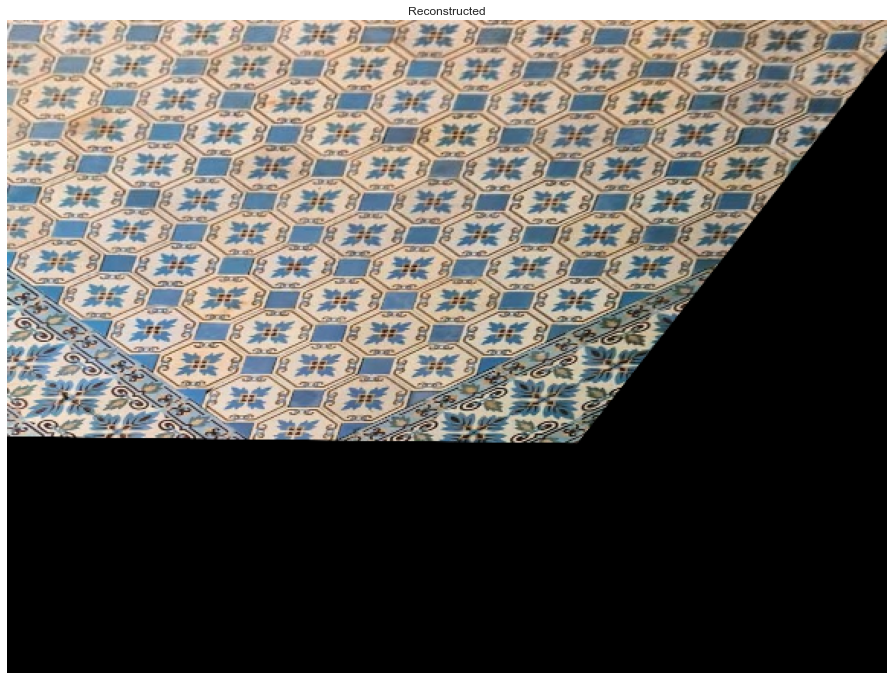

In [64]:
transformed_image = cv2.warpPerspective(image, H, (image.shape[1], image.shape[0]))
plt.imshow(transformed_image[:,:,::-1])
plt.axis("off")
plt.title("Reconstructed")
plt.show()